In [77]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.stats import boxcox, boxcox_normmax
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
os.chdir('C:\\Users\\krishna\\Desktop\\Data Science')

In [78]:
data = pd.read_excel('Dataset.xlsx')

## EXPLORATORY DATA ANALYSIS

In [79]:
data


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339
5,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision,57166.760954
6,Mar,2,Sunday,Mazda,Urban,Wednesday,Mar,3,Male,Single,...,over 65,No,No,External,none,no change,1 vehicle,1994,All Perils,62624.228715
7,Mar,5,Monday,Honda,Urban,Monday,Mar,5,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Liability,103420.785275
8,Jan,3,Friday,Ford,Urban,Friday,Jan,3,Male,Married,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Liability,59747.549439
9,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,...,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision,82211.859262


In [80]:
len(data)

11565

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 34 columns):
Month                   11565 non-null object
WeekOfMonth             11565 non-null int64
DayOfWeek               11565 non-null object
Make                    11565 non-null object
AccidentArea            11565 non-null object
DayOfWeekClaimed        11565 non-null object
MonthClaimed            11565 non-null object
WeekOfMonthClaimed      11565 non-null int64
Sex                     11565 non-null object
MaritalStatus           11565 non-null object
Age                     11560 non-null float64
Fault                   11565 non-null object
PolicyType              11565 non-null object
VehicleCategory         11565 non-null object
VehiclePrice            11565 non-null object
FraudFound_P            11565 non-null int64
PolicyNumber            11565 non-null int64
RepNumber               11565 non-null int64
Deductible              11565 non-null int64
DriverRating          

In [82]:
crosstable=pd.crosstab(data.FraudFound_P , data.Sex)
crosstable

Sex,Female,Male
FraudFound_P,,
0,1724,9156
1,73,612


In [83]:
crosstable=pd.crosstab(data.FraudFound_P , data.WitnessPresent)
crosstable

WitnessPresent,No,Yes
FraudFound_P,,
0,10814,66
1,683,2


In [84]:
crosstable=pd.crosstab(data.FraudFound_P , data.AgentType)
crosstable

AgentType,External,Internal
FraudFound_P,,
0,10713,167
1,681,4


C:\Users\krishna\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


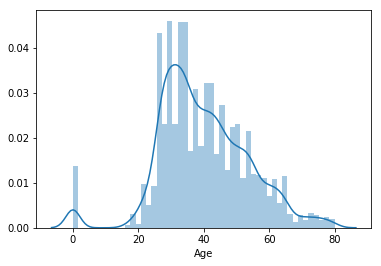

In [85]:
sns.distplot(data['Age'].dropna())

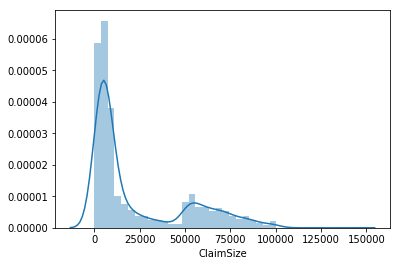

In [86]:
sns.distplot(data['ClaimSize'])

## Feature Engineering/Variable Transformation

In [87]:
#removing missing values and values equal to 0
data['Age'].loc[data['Age'] == 0] = data['Age'].median()
data['Age'] = data['Age'].fillna(data['Age'].median())

C:\Users\krishna\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [88]:
#making a categorical variable indicating ClaimSIze greater than 45000
data['ClaimSize_cat'] = data['ClaimSize'].apply(lambda x: 1 if x>45000 else (0))

In [89]:
#one hot encoding of categorical variables
AddressChange_Claim = pd.DataFrame()
AddressChange_Claim = pd.get_dummies(data['AddressChange_Claim'])
data=pd.concat([AddressChange_Claim,data], axis=1)
AddressChange_Claim.head()

,1 year,2 to 3 years,4 to 8 years,no change,under 6 months
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [90]:
NumberOfCars = pd.DataFrame()
NumberOfCars = pd.get_dummies(data['NumberOfCars'])
data=pd.concat([NumberOfCars,data], axis=1)
NumberOfCars.head()

,1 vehicle,2 vehicles,3 to 4,5 to 8,more than 8
0,0,0,1,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [91]:
Make = pd.DataFrame()
Make = pd.get_dummies(data['Make'])
data=pd.concat([Make,data], axis=1)
Make.head()

,Accura,BMW,Chevrolet,Dodge,Ferrari,Ford,Honda,Jaguar,Lexus,Mazda,Mecedes,Mercury,Nisson,Pontiac,Porche,Saab,Saturn,Toyota,VW
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
AgeOfVehicle = pd.DataFrame()
AgeOfVehicle = pd.get_dummies(data['AgeOfVehicle'])
data=pd.concat([AgeOfVehicle,data], axis=1)
AgeOfVehicle.head()

,2 years,3 years,4 years,5 years,6 years,7 years,more than 7,new
0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0


In [93]:
PolicyType = pd.DataFrame()
PolicyType = pd.get_dummies(data['PolicyType'])
data=pd.concat([PolicyType,data], axis=1)
PolicyType.head()

,Sedan - All Perils,Sedan - Collision,Sedan - Liability,Sport - All Perils,Sport - Collision,Sport - Liability,Utility - All Perils,Utility - Collision,Utility - Liability
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0


In [94]:
data = data.drop(['AddressChange_Claim', 'NumberOfCars' ,'Make' , 'AgeOfVehicle' , 'PolicyType' , 'PolicyNumber'  ] , axis = 1)

In [95]:
#label encoding of categorical variables
categorical_variables = data.dtypes.loc[data.dtypes=='object'].index
le = LabelEncoder()

for var in categorical_variables:
    data[var] = data[var].astype(str)
    
for var in categorical_variables:
    data[var] = le.fit_transform(data[var])

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 75 columns):
Sedan - All Perils      11565 non-null uint8
Sedan - Collision       11565 non-null uint8
Sedan - Liability       11565 non-null uint8
Sport - All Perils      11565 non-null uint8
Sport - Collision       11565 non-null uint8
Sport - Liability       11565 non-null uint8
Utility - All Perils    11565 non-null uint8
Utility - Collision     11565 non-null uint8
Utility - Liability     11565 non-null uint8
2 years                 11565 non-null uint8
3 years                 11565 non-null uint8
4 years                 11565 non-null uint8
5 years                 11565 non-null uint8
6 years                 11565 non-null uint8
7 years                 11565 non-null uint8
more than 7             11565 non-null uint8
new                     11565 non-null uint8
Accura                  11565 non-null uint8
BMW                     11565 non-null uint8
Chevrolet               11565 non-nu

In [97]:
data = data.drop(['Sport - All Perils','Utility - Collision','2 years','6 years','Chevrolet','Ford','Lexus','Mazda','Saab','Saturn','1 year','under 6 months','Utility - All Perils','Utility - Liability','3 years','Dodge','Honda','Mecedes','Mercury','Toyota','more than 8','2 to 3 years'], axis = 1)

In [98]:
Y = 'FraudFound_P'
X = [x for x in data.columns if x not in [Y]]

## MODEL

In [99]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(data, test_size=.2, stratify=data[Y])

In [100]:
import xgboost
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=300, scale_pos_weight=10)
model.fit(train[X] , train[Y])
pred = model.predict_proba(test[X])
outcome = model.predict(test[X])

In [105]:
from sklearn.metrics import roc_auc_score
roc_auc_score (test[Y],pred[:,1])

0.8525084531987978

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix(outcome,test[Y])

array([[1834,   51],
       [ 342,   86]], dtype=int64)

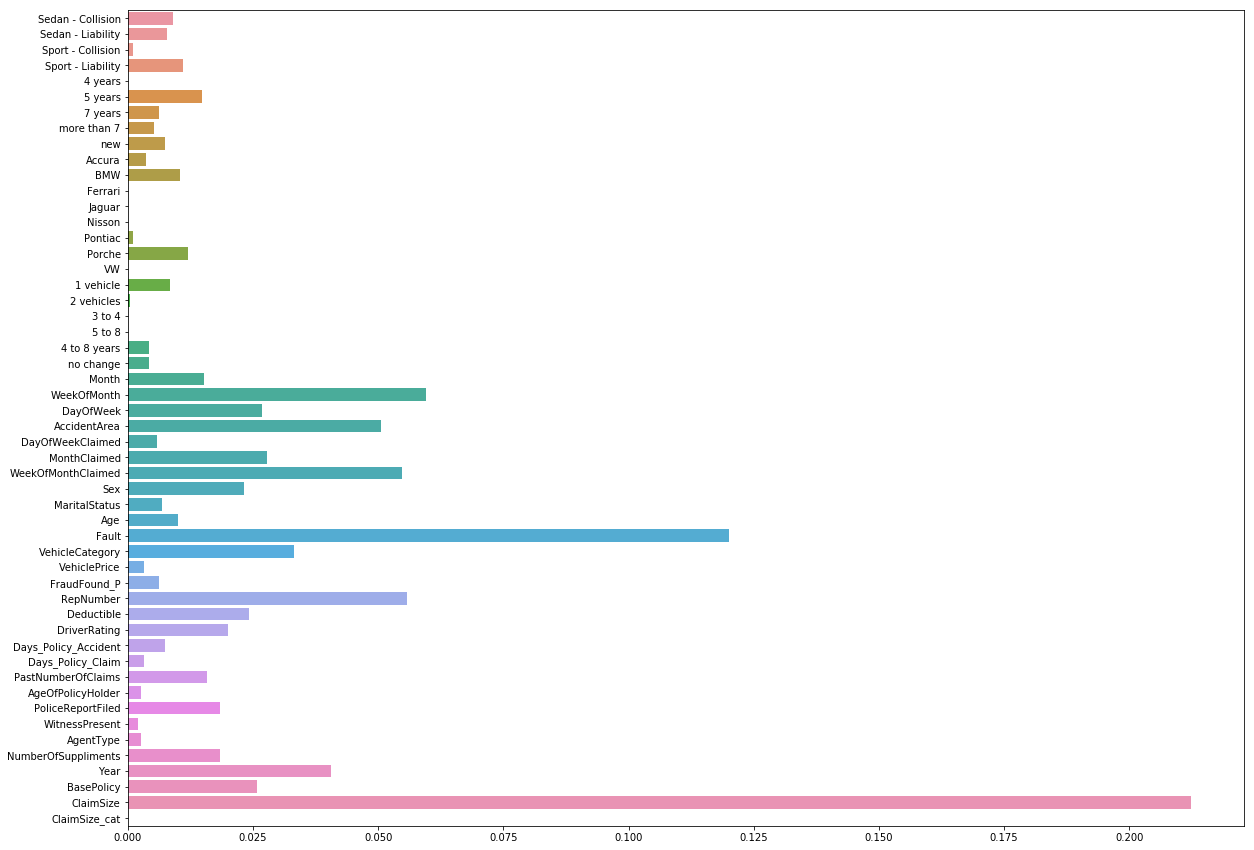

In [108]:
plt.figure(figsize=(20,15))
sns.barplot(model.feature_importances_, data.columns[1:])